In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

In [13]:
load_dotenv()  # take environment variables from .env file
model = ChatOpenAI(model="gpt-4o-mini")

In [14]:
# define state
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [15]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f"Generate a detailed outline for a blog post titled '{title}'."
    response = model.invoke(prompt).content
    state['outline'] = response
    return state

In [16]:
def write_content(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f"Write a comprehensive blog post titled '{title}' based on the following outline:\n{outline}"
    response = model.invoke(prompt).content
    state['content'] = response
    return state

In [17]:
# define graph
graph = StateGraph(BlogState)

# nodes
graph.add_node("create_outline", create_outline)
graph.add_node("write_content", write_content)

# edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "write_content")
graph.add_edge("write_content", END)

# compile the graph
workflow = graph.compile()

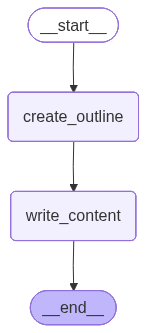

In [18]:
# Visualize the graph
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [19]:
initial_state = BlogState(title="The Future of AI in Healthcare", outline="", content="")
final_state = workflow.invoke(initial_state)

In [20]:
print(final_state['outline'])


### Blog Post Outline: The Future of AI in Healthcare

#### Introduction
- Brief overview of AI and its current prevalence in various industries.
- Importance of AI in healthcare: improving patient outcomes, enhancing operational efficiency, and reducing costs.
- Purpose of the blog post: to explore potential advancements, ethical considerations, and future opportunities of AI in the healthcare sector.

#### I. Current Landscape of AI in Healthcare
   A. Overview of Existing AI Technologies
      1. Machine learning and predictive analytics
      2. Natural language processing (NLP)
      3. Robotics and automation
      4. Computer vision
   B. Real-world Applications
      1. Diagnostic tools (e.g., image analysis in radiology)
      2. Virtual health assistants and chatbots
      3. Personalized medicine and genomics
      4. Administrative automation (e.g., scheduling, billing)

#### II. Future Innovations in AI Technology
   A. Enhanced Diagnostic Capabilities
      1. More accura

In [21]:
print(final_state['content'])

# The Future of AI in Healthcare

## Introduction

Artificial intelligence (AI) has rapidly transformed various sectors, from finance to marketing, but its impact on healthcare is proving to be particularly profound. As healthcare systems around the world grapple with increasing demands, rising costs, and the need for improved patient outcomes, AI emerges as a powerful ally. By leveraging advanced machine learning algorithms, predictive analytics, and automation, AI has the potential to revolutionize how we approach patient care, streamline operations, and reduce expenditures. In this blog post, we will delve into the current landscape of AI in healthcare, explore future innovations, consider ethical implications, discuss challenges, predict future trends, and highlight real-world examples of successful AI implementation.

## I. Current Landscape of AI in Healthcare

### A. Overview of Existing AI Technologies

The current realm of AI in healthcare is diverse and multifaceted. Key tech